# Labs Access Analysis: 06 Population Analysis with Facebook Data - No overlaps between isochrones

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import os
import gc
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

/Users/massimo/Documents/GitHub/labs_access_analysis/env/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
url_data_labs = "data/labs.csv"
url_data_isochrones = "data/isochrones.json"

## Load the data of the labs

load the data with valid coordinates

In [3]:
# Load data, csv
data_csv = pd.read_csv(url_data_labs)
data_csv['Lat'] = data_csv['Lat'].astype(float)
data_csv['Long'] = data_csv['Long'].astype(float)
data_csv = data_csv[(((~data_csv.Lat.isnull()) & (~data_csv.Long.isnull())))]

creation of the geodataframe

In [4]:
data_labs = gpd.GeoDataFrame(
    data_csv,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(data_csv.Long, data_csv.Lat))

show the first 5 rows

In [5]:
data_labs.head(5)

,Name,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,geometry
0,Fab Lab Barcelona,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692)
1,MADE Makerspace Barcelona,Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN,POINT (2.14108 41.37324)
2,Soko Tech,Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN,POINT (2.18888 41.42454)
3,LSCongres,Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN,POINT (2.18203 41.42600)
4,Green Fab Lab,Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,POINT (2.13344 41.45039)


In [6]:
#data_labs.set_index('Unnamed: 0', inplace=True)
#data_labs.index.names = ['']

show the data on map

In [7]:
data_labs.explore()

## Analyse the isochrones

load the isochrones

In [8]:
isochrones = pd.read_json(url_data_isochrones)

show the first 5 rows

In [9]:
isochrones.head(5)

,type,bbox,features,metadata,name
0,FeatureCollection,"[2.181516, 41.386679, 2.206919, 41.408053]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Fab Lab Barcelona
1,FeatureCollection,"[2.127469, 41.362337, 2.15604, 41.384602]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,MADE Makerspace Barcelona
2,FeatureCollection,"[2.174851, 41.412242, 2.201936, 41.435773]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Soko Tech
3,FeatureCollection,"[2.167014, 41.414324, 2.195414, 41.437322]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,LSCongres
4,FeatureCollection,"[2.126857, 41.443694, 2.14223, 41.454446]","[{'type': 'Feature', 'properties': {'group_ind...",{'attribution': 'openrouteservice.org | OpenSt...,Green Fab Lab


create the geodataframe

In [10]:
isochrones['longitude'] = isochrones['metadata'].apply(lambda x: x['query']['locations'][0][0])
isochrones['latitude'] = isochrones['metadata'].apply(lambda x: x['query']['locations'][0][1])
isochrones['area_units'] = isochrones['metadata'].apply(lambda x: x['query']['area_units'])

In [11]:
isochrones['total_pop'] = isochrones['features'].apply(lambda x: x[0]['properties']['total_pop'])
isochrones['area'] = isochrones['features'].apply(lambda x:x[0]['properties']['area'])
isochrones['reachfactor'] = isochrones['features'].apply(lambda x: x[0]['properties']['reachfactor'])

In [12]:
isochrones['coordinates'] = isochrones['features'].apply(lambda x: x[0]['geometry']['coordinates'])
isochrones['geometry_type'] = isochrones['features'].apply(lambda x: x[0]['geometry']['type'])

In [13]:
isochrones['geometry'] = isochrones['coordinates'].apply(lambda x: Polygon(x[0]))

In [14]:
isochrones = isochrones[['name','longitude','latitude','total_pop','area','reachfactor','geometry']]

In [15]:
isochrones = gpd.GeoDataFrame(
    isochrones,
    geometry=isochrones.geometry,
    crs='EPSG:4326')

show the isochrones on a map

In [16]:
isochrones.explore()

show the first 5 rows

In [17]:
isochrones.head(5)

,name,longitude,latitude,total_pop,area,reachfactor,geometry
0,Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,"POLYGON ((2.18152 41.39531, 2.18197 41.39116, ..."
1,MADE Makerspace Barcelona,2.141084,41.373238,87403.0,4378946.71,0.8921,"POLYGON ((2.12747 41.37483, 2.12856 41.36899, ..."
2,Soko Tech,2.188883,41.424535,91433.0,4353937.57,0.8870,"POLYGON ((2.17485 41.42471, 2.17489 41.42377, ..."
3,LSCongres,2.182026,41.426002,95371.0,4497971.38,0.9163,"POLYGON ((2.16701 41.42773, 2.16735 41.42654, ..."
4,Green Fab Lab,2.133441,41.450394,49.0,845558.02,0.1723,"POLYGON ((2.12686 41.45092, 2.12691 41.45013, ..."


save as geojson file

In [18]:
isochrones.to_file("data" + os.sep + "lab_isochrones.geojson",driver='GeoJSON')

### merge the attributes of the isochrones with the data of the labs


In [19]:
columns = {
    'name': 'Name'
}
isochrones.rename(columns=columns, inplace=True)

extend the attributes of the isochrones with the data of the labs

In [20]:
labs = isochrones.merge(data_labs, on="Name")
labs = gpd.GeoDataFrame(labs)

In [21]:
columns = {
    'geometry_x': 'geometry'
}
labs.rename(columns=columns, inplace=True)

read the first 5 row

In [22]:
labs.head(5)

,Name,longitude,latitude,total_pop,area,reachfactor,geometry,Type,City,Cluster,Address,CAP,Lat,Long,Source,URL,Notes,geometry_y
0,Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,"POLYGON ((2.18152 41.39531, 2.18197 41.39116, ...",Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692)
1,MADE Makerspace Barcelona,2.141084,41.373238,87403.0,4378946.71,0.8921,"POLYGON ((2.12747 41.37483, 2.12856 41.36899, ...",Fab Lab,Barcelona,BCN,Carrer Noguera Pallaresa 59-61,8014.0,41.373238,2.141084,"Fablabs.io, Hackerspaces.org, Makerspaces.make.co",NaN,NaN,POINT (2.14108 41.37324)
2,Soko Tech,2.188883,41.424535,91433.0,4353937.57,0.8870,"POLYGON ((2.17485 41.42471, 2.17489 41.42377, ...",Fab Lab,Barcelona,BCN,"Carrer de Vallès i Ribot, 36",8027.0,41.424535,2.188883,Fablabs.io,https://soko.tech/,NaN,POINT (2.18888 41.42454)
3,LSCongres,2.182026,41.426002,95371.0,4497971.38,0.9163,"POLYGON ((2.16701 41.42773, 2.16735 41.42654, ...",Fab Lab,Barcelona,BCN,"Carrer del Cardenal Tedeschini, 50",8027.0,41.426002,2.182026,Fablabs.io,https://fablabs.io/labs/lscongres,NaN,POINT (2.18203 41.42600)
4,Green Fab Lab,2.133441,41.450394,49.0,845558.02,0.1723,"POLYGON ((2.12686 41.45092, 2.12691 41.45013, ...",Fab Lab,Cerdanyola del Vallès,BCN,"Ctra. BV-1415 (Horta-Cerdanyola), km 7",8290.0,41.450394,2.133441,Fablabs.io,NaN,NaN,POINT (2.13344 41.45039)


In [23]:
columns = {
    'Name': 'name',
    'Type': 'type',
    'City': 'city',
    'Cluster':  'cluster',
    'Address': 'address',
    'CAP': 'zipcode',
    'Source': 'source',
    'URL': 'url',
    'Notes': 'notes',
    'geomtry_y': 'geomtry'
}
labs.rename(columns=columns, inplace=True)

In [24]:
#labs.to_file("data/labs_isochrones.geojson",driver='GeoJSON')

## Analysis of Facebook data

### Setup and functions

In [25]:
labs_ita = labs[labs.cluster == "MI"]
labs_esp = labs[labs.cluster == "BCN"]
labs_ita = gpd.GeoDataFrame(labs_ita)
labs_esp = gpd.GeoDataFrame(labs_esp)

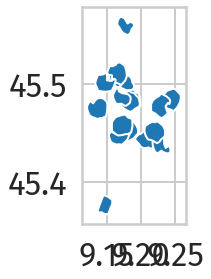

In [26]:
labs_ita.plot()
plt.show()

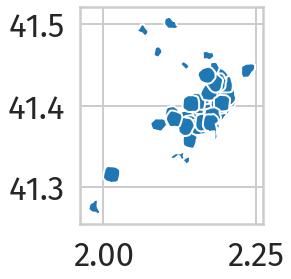

In [27]:
labs_esp.plot()
plt.show()

In [28]:
area_total_ita = labs[labs.cluster == "MI"].dissolve(by='cluster').set_crs(epsg=4326, inplace=True)
area_total_esp = labs[labs.cluster == "BCN"].dissolve(by='cluster').set_crs(epsg=4326, inplace=True)

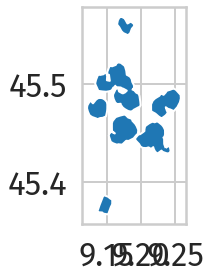

In [29]:
area_total_ita.plot()
plt.show()

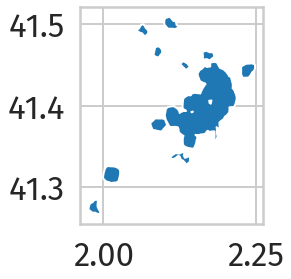

In [30]:
area_total_esp.plot()
plt.show()

In [31]:
area_total_esp

,geometry,name,longitude,latitude,total_pop,area,reachfactor,type,city,address,zipcode,Lat,Long,source,url,notes,geometry_y
cluster,,,,,,,,,,,,,,,,,
BCN,"MULTIPOLYGON (((1.98378 41.28184, 1.98459 41.2...",Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,Fab Lab,Barcelona,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,None,POINT (2.19434 41.39692)


functions needed for the analysis

In [32]:
def getgeodataframearea(points,x,y):
    global isochrones
    env = env = isochrones.envelope.unary_union.bounds
    area = points[(points[x] >= env[0]) & (points[x] <= env[2]) & (points[y] >= env[1]) & (points[y] <= env[3])]
    geodataframe = gpd.GeoDataFrame(
        points,
        crs='EPSG:4326',
        geometry=gpd.points_from_xy(points[x], points[y]))
    return geodataframe

In [33]:
def adddatafromfile(data, file, column, datacolumn, coordcolname, tab):
    if tab:
        new_data = pd.read_csv(file, sep='\t')
    else:
        new_data = pd.read_csv(file)
    if coordcolname == "LatLon":
        new_data.rename({'Lon': 'longitude', 'Lat': 'latitude', 'Population': 'population'}, axis=1, inplace=True)
    else:
        new_data.rename({datacolumn: 'population'}, axis=1, inplace=True)
    points_cluster = getgeodataframearea(new_data,x='longitude',y='latitude')
    # save memory - destroy dataframe unused
    # del [[isochrones,ita_population,ita_15_24]]
    del [[new_data]]
    gc.collect()
    isochrones=pd.DataFrame()
    new_data=pd.DataFrame()
    sjoin_lab_points = points_cluster.sjoin(data, how='inner')
    data[column] = data.city.apply(lambda x: round(sjoin_lab_points[sjoin_lab_points.city == x].population.sum()))
    return

### add for Italy

In [34]:
prefix = "data" + os.sep + "hdx" + os.sep
adddatafromfile(data=area_total_ita, file = prefix + "population_ita_2019-07-01.csv", column='total', datacolumn="Population", coordcolname="LatLon", tab=False)

In [35]:
adddatafromfile(data=area_total_ita, file = prefix + "ITA_men_2019-08-03.csv", column='men', datacolumn="population", coordcolname="LatitudeLongitude", tab=True)

In [36]:
adddatafromfile(data=area_total_ita, file = prefix + "ITA_women_2019-08-03.csv", column='women', datacolumn="population", coordcolname="LatitudeLongitude", tab=True)

### add data for Spain

In [37]:
adddatafromfile(data=area_total_esp, file = prefix + "esp_general_2020.csv", column='total', datacolumn="esp_general_2020", coordcolname="LatitudeLongitude", tab=False)

In [38]:
adddatafromfile(data=area_total_esp, file = prefix + "esp_men_2020.csv", column='men', datacolumn="esp_men_2020", coordcolname="LatitudeLongitude", tab=False)

In [39]:
adddatafromfile(data=area_total_esp, file = prefix + "esp_women_2020.csv", column='women', datacolumn="esp_women_2020", coordcolname="LatitudeLongitude", tab=False)

In [40]:
area_total_ita

,geometry,name,longitude,latitude,total_pop,area,reachfactor,type,city,address,zipcode,Lat,Long,source,url,notes,geometry_y,total,men,women
cluster,,,,,,,,,,,,,,,,,,,,
MI,"MULTIPOLYGON (((9.23636 45.43439, 9.24038 45.4...",The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,None,POINT (9.20791 45.44405),480947,209791,225097


In [41]:
area_total_esp

,geometry,name,longitude,latitude,total_pop,area,reachfactor,type,city,address,zipcode,Lat,Long,source,url,notes,geometry_y,total,men,women
cluster,,,,,,,,,,,,,,,,,,,,
BCN,"MULTIPOLYGON (((1.98378 41.28184, 1.98459 41.2...",Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,Fab Lab,Barcelona,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,None,POINT (2.19434 41.39692),1335063,636049,699014


total of area for men and women covered from the cluster of Milan

In [42]:
area_total_ita[["total", "men", "women"]]

,total,men,women
cluster,,,
MI,480947,209791,225097


total of area for men and women covered from the cluster of Barcelona

In [43]:
area_total_esp[["total", "men", "women"]]

,total,men,women
cluster,,,
BCN,1335063,636049,699014


unione of the data

In [44]:
area_total_both = pd.concat([area_total_ita, area_total_esp])

In [45]:
area_total_both

,geometry,name,longitude,latitude,total_pop,area,reachfactor,type,city,address,zipcode,Lat,Long,source,url,notes,geometry_y,total,men,women
cluster,,,,,,,,,,,,,,,,,,,,
MI,"MULTIPOLYGON (((9.23636 45.43439, 9.24038 45.4...",The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,None,POINT (9.20791 45.44405),480947,209791,225097
BCN,"MULTIPOLYGON (((1.98378 41.28184, 1.98459 41.2...",Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,Fab Lab,Barcelona,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,None,POINT (2.19434 41.39692),1335063,636049,699014


### Plot the data

population reached

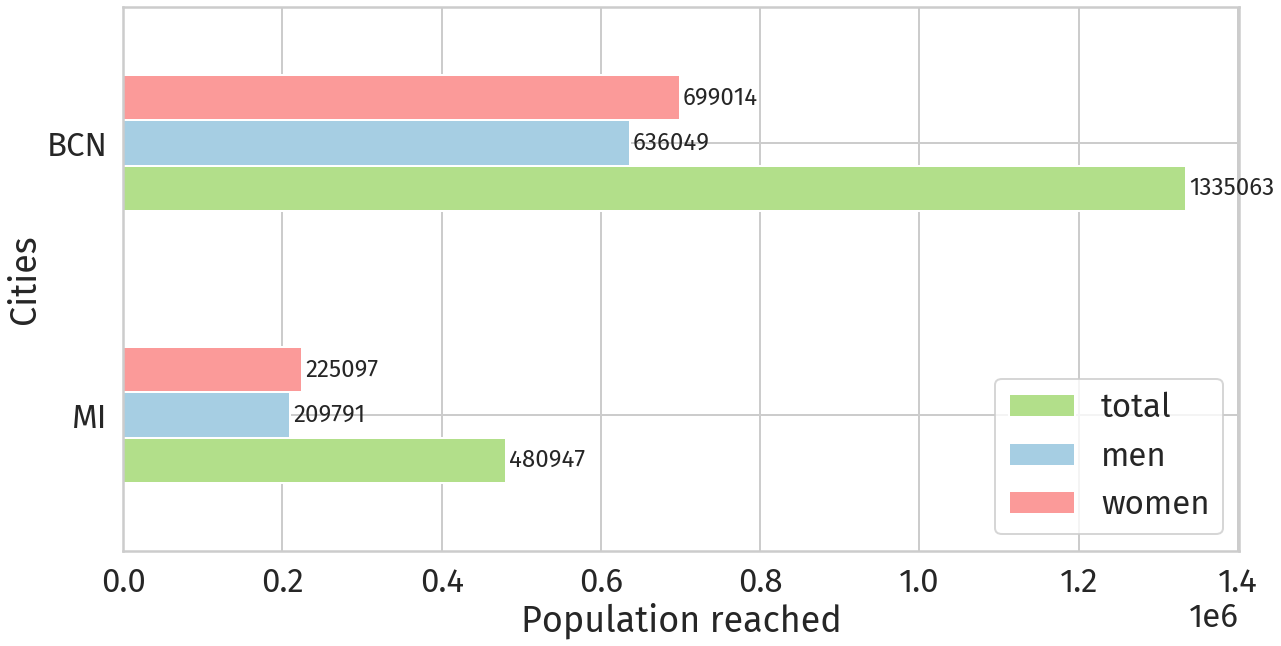

In [46]:
colors = [sns.color_palette("Paired")[2],sns.color_palette("Paired")[0],sns.color_palette("Paired")[4]]
ax = area_total_both[["total", "men", "women"]].plot(kind="barh", color=colors, figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%d", size=24, padding=3)
ax.bar_label(ax.containers[1], fmt="%d", size=24, padding=3)
ax.bar_label(ax.containers[2], fmt="%d", size=24, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Cities')
plt.savefig("svg" + os.sep + "labs_esp_ita_fbpop_tot.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_esp_ita_fbpop_tot.png", dpi=300, bbox_inches="tight")

### area

In [47]:
area_total_both["area"]

cluster
MI     3753146.09
BCN    4444783.82
Name: area, dtype: float64

In [48]:
area_total_both.set_crs(epsg=4326, inplace=True)

,geometry,name,longitude,latitude,total_pop,area,reachfactor,type,city,address,zipcode,Lat,Long,source,url,notes,geometry_y,total,men,women
cluster,,,,,,,,,,,,,,,,,,,,
MI,"MULTIPOLYGON (((9.23636 45.43439, 9.24038 45.4...",The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,None,POINT (9.20791 45.44405),480947,209791,225097
BCN,"MULTIPOLYGON (((1.98378 41.28184, 1.98459 41.2...",Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,Fab Lab,Barcelona,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,None,POINT (2.19434 41.39692),1335063,636049,699014


show the areas on the map

In [49]:
area_total_both.explore()

In [50]:
area_total_both.to_crs(epsg=3857).geometry.area

cluster
MI     9.669843e+07
BCN    1.426962e+08
dtype: float64

area in square kilometers

In [51]:
area_total_square_km = area_total_both.to_crs(epsg=3857).geometry.area / 1000000.0

In [52]:
area_total_square_km

cluster
MI      96.698435
BCN    142.696195
dtype: float64

Plot the data

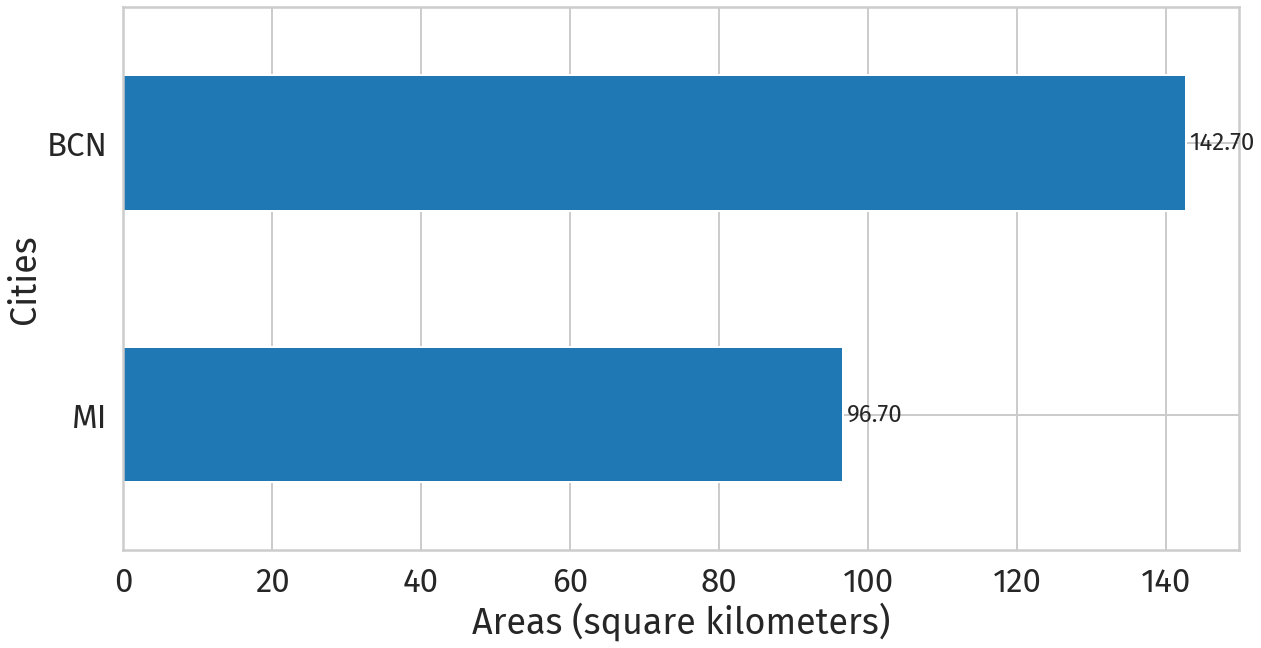

In [53]:
ax = area_total_square_km.plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%.2f", size=24, padding=3)
plt.xlabel('Areas (square kilometers)')
plt.ylabel('Cities')
plt.savefig("svg" + os.sep + "labs_esp_ita_area_tot.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_esp_ita_area_tot.png", dpi=300, bbox_inches="tight")

### Intersections / Overlaps

#### Italy

In [54]:
labs_ita_intersections = gpd.overlay(labs_ita, labs_ita, how="intersection")

In [55]:
print("The number of labs in Italy is %d" % labs_ita.shape[0])

The number of labs in Italy is 20


show the first 5 rows

In [56]:
labs_ita_intersections.head(5)

,name_1,longitude_1,latitude_1,total_pop_1,area_1,reachfactor_1,type_1,city_1,cluster_1,address_1,...,cluster_2,address_2,zipcode_2,Lat_2,Long_2,source_2,url_2,notes_2,geometry_y_2,geometry
0,The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.19166 45.44303, 9.19176 45.44332, ..."
1,Vectorealism FabLab,9.231811,45.438305,25520.0,2833731.26,0.5773,Service,Milan,MI,"Via Carlo Boncompagni, 57",...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.21755 45.43716, 9.21727 45.44017, ..."
2,Opendot,9.220968,45.450348,56951.0,4261112.70,0.8681,Fab Lab,Milan,MI,"Via Tertulliano, 70",...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.22092 45.44032, 9.22086 45.44035, ..."
3,The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",...,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830),"POLYGON ((9.22347 45.44377, 9.22348 45.44373, ..."
4,Vectorealism FabLab,9.231811,45.438305,25520.0,2833731.26,0.5773,Service,Milan,MI,"Via Carlo Boncompagni, 57",...,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830),"POLYGON ((9.21727 45.44017, 9.21764 45.44382, ..."


show the data on the map

In [57]:
labs_ita_intersections.explore()

Overlapping areas is where name_1 and name_2 column are different, indicating which labs overlaps

In [58]:
labs_ita_intersections.set_index("name_1").loc["The FabLab: Make in Milano"]

,longitude_1,latitude_1,total_pop_1,area_1,reachfactor_1,type_1,city_1,cluster_1,address_1,zipcode_1,...,cluster_2,address_2,zipcode_2,Lat_2,Long_2,source_2,url_2,notes_2,geometry_y_2,geometry
name_1,,,,,,,,,,,,,,,,,,,,,
The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",20139.0,...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.19166 45.44303, 9.19176 45.44332, ..."
The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",20139.0,...,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830),"POLYGON ((9.22347 45.44377, 9.22348 45.44373, ..."
The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",20139.0,...,MI,"Via Tertulliano, 70",20137.0,45.450348,9.220968,Fablabs.io,https://fablabs.io/labs/opendot,NaN,POINT (9.22097 45.45035),"POLYGON ((9.20598 45.45222, 9.21078 45.45300, ..."


the areas of one lab..


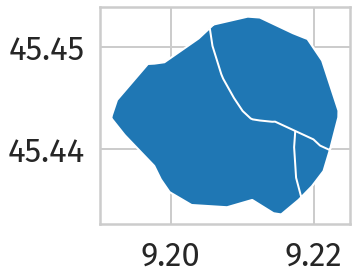

In [59]:
labs_ita_intersections.set_index("name_1").loc["The FabLab: Make in Milano"].plot()
plt.show()

Overall area

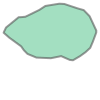

In [60]:
labs_ita.set_index("name").loc["The FabLab: Make in Milano"].geometry

area 0

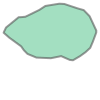

In [61]:
labs_ita_intersections.set_index("name_1").loc["The FabLab: Make in Milano"].iloc[0].geometry

area 1

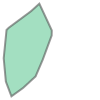

In [62]:
labs_ita_intersections.set_index("name_1").loc["The FabLab: Make in Milano"].iloc[1].geometry

area 2

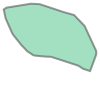

In [63]:
labs_ita_intersections.set_index("name_1").loc["The FabLab: Make in Milano"].iloc[2].geometry

Create a dataframe with overlapping areas

In [64]:
overlapping_areas_ita = labs_ita_intersections.loc[~(labs_ita_intersections['name_1'] == labs_ita_intersections['name_2'])]

show the data

In [65]:
overlapping_areas_ita

,name_1,longitude_1,latitude_1,total_pop_1,area_1,reachfactor_1,type_1,city_1,cluster_1,address_1,...,cluster_2,address_2,zipcode_2,Lat_2,Long_2,source_2,url_2,notes_2,geometry_y_2,geometry
1,Vectorealism FabLab,9.231811,45.438305,25520.0,2833731.26,0.5773,Service,Milan,MI,"Via Carlo Boncompagni, 57",...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.21755 45.43716, 9.21727 45.44017, ..."
2,Opendot,9.220968,45.450348,56951.0,4261112.70,0.8681,Fab Lab,Milan,MI,"Via Tertulliano, 70",...,MI,"Via Arcivescovo Calabiana, 6",20139.0,45.444046,9.207913,Fablabs.io,https://www.thefablab.it/,NaN,POINT (9.20791 45.44405),"POLYGON ((9.22092 45.44032, 9.22086 45.44035, ..."
3,The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",...,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830),"POLYGON ((9.22347 45.44377, 9.22348 45.44373, ..."
5,Opendot,9.220968,45.450348,56951.0,4261112.70,0.8681,Fab Lab,Milan,MI,"Via Tertulliano, 70",...,MI,"Via Carlo Boncompagni, 57",20139.0,45.438305,9.231811,Fablabs.io,https://fablabs.io/labs/vectorealismfablab,NaN,POINT (9.23181 45.43830),"POLYGON ((9.22923 45.44287, 9.22855 45.44170, ..."
6,The FabLab: Make in Milano,9.207913,45.444046,40656.0,3753146.09,0.7646,Fab Lab,Milan,MI,"Via Arcivescovo Calabiana, 6",...,MI,"Via Tertulliano, 70",20137.0,45.450348,9.220968,Fablabs.io,https://fablabs.io/labs/opendot,NaN,POINT (9.22097 45.45035),"POLYGON ((9.20598 45.45222, 9.21078 45.45300, ..."
7,Vectorealism FabLab,9.231811,45.438305,25520.0,2833731.26,0.5773,Service,Milan,MI,"Via Carlo Boncompagni, 57",...,MI,"Via Tertulliano, 70",20137.0,45.450348,9.220968,Fablabs.io,https://fablabs.io/labs/opendot,NaN,POINT (9.22097 45.45035),"POLYGON ((9.21764 45.44382, 9.21792 45.44410, ..."
10,Miocugino - officina di gesta e ingegno,9.168956,45.448219,39458.0,3803092.83,0.7748,Makerspace,Milan,MI,via argelati 35,...,MI,"Corso S. Gottardo, 19",20136.0,45.452457,9.179818,Fablabs.io,https://fablabs.io/labs/DamASpaceFablab,NaN,POINT (9.17982 45.45246),"POLYGON ((9.16589 45.45665, 9.16690 45.45819, ..."
11,SuperForma,9.173072,45.457594,57463.0,4482719.37,0.9132,Service,Milan,MI,"Via Fabio Mangone, 1/A,",...,MI,"Corso S. Gottardo, 19",20136.0,45.452457,9.179818,Fablabs.io,https://fablabs.io/labs/DamASpaceFablab,NaN,POINT (9.17982 45.45246),"POLYGON ((9.18769 45.46202, 9.18790 45.45687, ..."
12,DamASpace,9.179818,45.452457,58690.0,4808370.81,0.9796,Fab Lab,Milan,MI,"Corso S. Gottardo, 19",...,MI,via argelati 35,20143.0,45.448219,9.168956,Fablabs.io,https://fablabs.io/labs/miocugino,NaN,POINT (9.16896 45.44822),"POLYGON ((9.17735 45.44186, 9.17571 45.44178, ..."
14,SuperForma,9.173072,45.457594,57463.0,4482719.37,0.9132,Service,Milan,MI,"Via Fabio Mangone, 1/A,",...,MI,via argelati 35,20143.0,45.448219,9.168956,Fablabs.io,https://fablabs.io/labs/miocugino,NaN,POINT (9.16896 45.44822),"POLYGON ((9.18070 45.44844, 9.18051 45.44844, ..."


show the data on a map

In [66]:
overlapping_areas_ita.explore()

Compare the areas on the map

In [67]:
labs_ita.set_crs(epsg=4326).explore()

area of all areas

In [68]:
overlapping_areas_ita.to_crs(epsg=3857).geometry.area

1     8.137379e+05
2     2.562447e+06
3     8.137379e+05
5     1.532238e+06
6     2.562447e+06
7     1.532238e+06
10    4.522711e+06
11    5.659421e+06
12    4.522711e+06
14    3.206976e+06
15    5.659421e+06
16    3.206976e+06
19    3.041993e+06
20    1.293144e+06
21    5.577092e+06
22    4.957400e+06
23    6.111375e+05
24    3.041993e+06
26    2.531423e+05
27    2.213855e+06
28    1.949521e+05
29    3.788776e+04
30    2.042433e+06
31    1.293144e+06
32    2.531423e+05
34    1.361911e+06
35    6.363298e+05
36    4.492617e+06
37    5.577092e+06
38    2.213855e+06
39    1.361911e+06
41    4.945350e+06
42    6.691480e+05
43    4.957400e+06
44    2.042433e+06
45    6.363298e+05
46    4.945350e+06
48    1.725696e+05
49    6.111375e+05
50    4.492617e+06
51    6.691480e+05
52    1.725696e+05
54    1.949521e+05
56    7.305057e+06
57    2.748052e+06
58    3.788776e+04
59    7.305057e+06
61    2.471576e+06
63    1.644395e+06
64    1.644395e+06
68    2.748052e+06
69    2.471576e+06
dtype: float

cumulative overlaps = individual areas served by more than 1 lab, with overlaps

In [69]:

overlapping_areas_ita.to_crs(epsg=3857).geometry.area.sum() / 1000000

129.9351446529525

union of overlaps = overall area that is served by more than 1 lab, union with no overlaps


In [70]:
overlapping_areas_ita.dissolve(by='cluster_1').to_crs(epsg=3857).geometry.area.sum() / 1000000

31.87162233838185

percentage of overlap


In [71]:
overlap_total_area_ita = overlapping_areas_ita.dissolve(by='cluster_1').to_crs(epsg=3857).geometry.area.sum() / 1000000
total_area_ita = area_total_both.to_crs(epsg=3857).loc["MI"].geometry.area / 1000000
percentage_ita = overlap_total_area_ita / total_area_ita * 100
print(percentage_ita,"%")

32.9598120038453 %


### Spain

In [72]:
labs_esp_intersections = gpd.overlay(labs_esp, labs_esp, how="intersection")

number of lab areas in Spain

In [73]:
print("the number of the labs in the area is %s" % str(labs_esp.shape[0]))

the number of the labs in the area is 46


In [74]:
print("the number of overlapping areas in Spain is %s" % str(labs_esp_intersections.shape[0]))

the number of overlapping areas in Spain is 336


show the first 5 rows

In [75]:
labs_esp_intersections.head(5)

,name_1,longitude_1,latitude_1,total_pop_1,area_1,reachfactor_1,type_1,city_1,cluster_1,address_1,...,cluster_2,address_2,zipcode_2,Lat_2,Long_2,source_2,url_2,notes_2,geometry_y_2,geometry
0,Fab Lab Barcelona,2.194335,41.396925,90862.0,4444783.82,0.9055,Fab Lab,Barcelona,BCN,"Carrer de Pujades, 102",...,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692),"POLYGON ((2.18152 41.39531, 2.18186 41.39979, ..."
1,Danaus,2.203960,41.408007,100054.0,4821324.40,0.9822,Hackerspace,Barcelona,BCN,Av. Diagonal 114,...,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692),"POLYGON ((2.20408 41.39778, 2.20001 41.39794, ..."
2,AKASHA Hub Barcelona,2.191146,41.411054,96774.0,4579290.88,0.9329,Hackerspace,Barcelona,BCN,"carrer de la verneda, 17 loc1",...,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692),"POLYGON ((2.20331 41.40413, 2.20296 41.40292, ..."
3,Maker Convent,2.181014,41.387737,87482.0,4390605.44,0.8944,Makerspace,Barcelona,BCN,Plaça de l’Acadèmia s/n,...,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692),"POLYGON ((2.18251 41.39878, 2.18526 41.39817, ..."
4,Ateneu de Fabricació La Fàbrica del Sol,2.191718,41.382352,47179.0,2690404.47,0.5481,Ateneu de Fabricació,Barcelona,BCN,"Passeig de Salvat Papasseit, 1",...,BCN,"Carrer de Pujades, 102",8005.0,41.396925,2.194335,Fablabs.io,https://fablabbcn.org/,NaN,POINT (2.19434 41.39692),"POLYGON ((2.18438 41.38877, 2.18495 41.38876, ..."


the areas of one lab


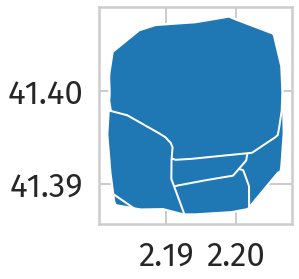

In [76]:
labs_esp_intersections.set_index("name_1").loc["Fab Lab Barcelona"].plot()
plt.show()

create a dataframe with overlapping areas

In [77]:
overlapping_areas_esp = labs_esp_intersections.loc[~(labs_esp_intersections['name_1'] == labs_esp_intersections['name_2'])]

show the data on the map

In [78]:
overlapping_areas_esp.explore()

In [79]:
labs_esp_intersections.explore()

compare with areas

In [80]:
labs_esp.set_crs(epsg=4326).explore()

area of all areas.. 


In [81]:
overlapping_areas_esp.to_crs(epsg=3857).geometry.area

1      2.439927e+06
2      2.234392e+06
3      1.780851e+06
4      1.334917e+06
5      1.671944e+06
           ...     
324    6.845688e+04
326    7.269055e+05
327    4.001618e+06
331    5.199148e+05
332    5.199148e+05
Length: 290, dtype: float64

cumulative overlaps = individual areas served by more than 1 lab, with overlaps

In [82]:
overlapping_areas_esp.to_crs(epsg=3857).geometry.area.sum() / 1000000

599.8863094896335

union of overlaps = overall area that is served by more than 1 lab, union with no overlaps


In [83]:
overlapping_areas_esp.dissolve(by='cluster_1').to_crs(epsg=3857).geometry.area.sum() / 1000000

71.48276895972057

Percentage of overlap:


In [84]:
overlap_total_area_esp = overlapping_areas_esp.dissolve(by='cluster_1').to_crs(epsg=3857).geometry.area.sum() / 1000000
total_area_esp = area_total_both.to_crs(epsg=3857).loc["BCN"].geometry.area / 1000000
percentage_esp = overlap_total_area_esp / total_area_esp * 100
print(percentage_esp,"%")

50.09437620287818 %


data for plotting


In [85]:
areas_plot = pd.DataFrame(columns = ["City", "Total area reached", "Overlapping area"])

In [86]:
areas_plot = areas_plot.append({'City':'BCN', 'Total area reached':total_area_esp, 'Overlapping area': overlap_total_area_esp}, ignore_index=True)

In [87]:
areas_plot = areas_plot.append({'City':'MI', 'Total area reached':total_area_ita, 'Overlapping area': overlap_total_area_ita}, ignore_index=True)

In [88]:
areas_plot.set_index("City", inplace=True)

plot the data

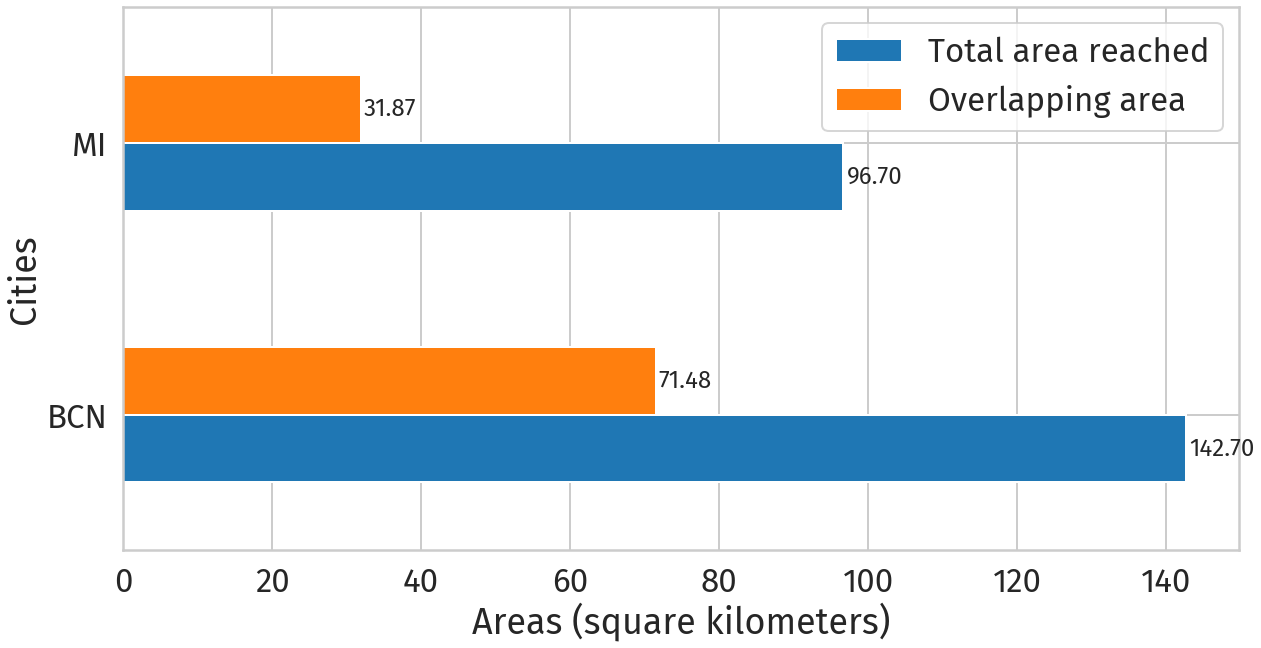

In [89]:
ax = areas_plot.plot(kind="barh", figsize=(20,10))
ax.bar_label(ax.containers[0], fmt="%.2f", size=24, padding=3)
ax.bar_label(ax.containers[1], fmt="%.2f", size=24, padding=3)
plt.xlabel('Areas (square kilometers)')
plt.ylabel('Cities')
plt.savefig("svg" + os.sep + "labs_esp_ita_area_tot_overlaps.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_esp_ita_area_tot_overlaps.png", dpi=300, bbox_inches="tight")

two plots together


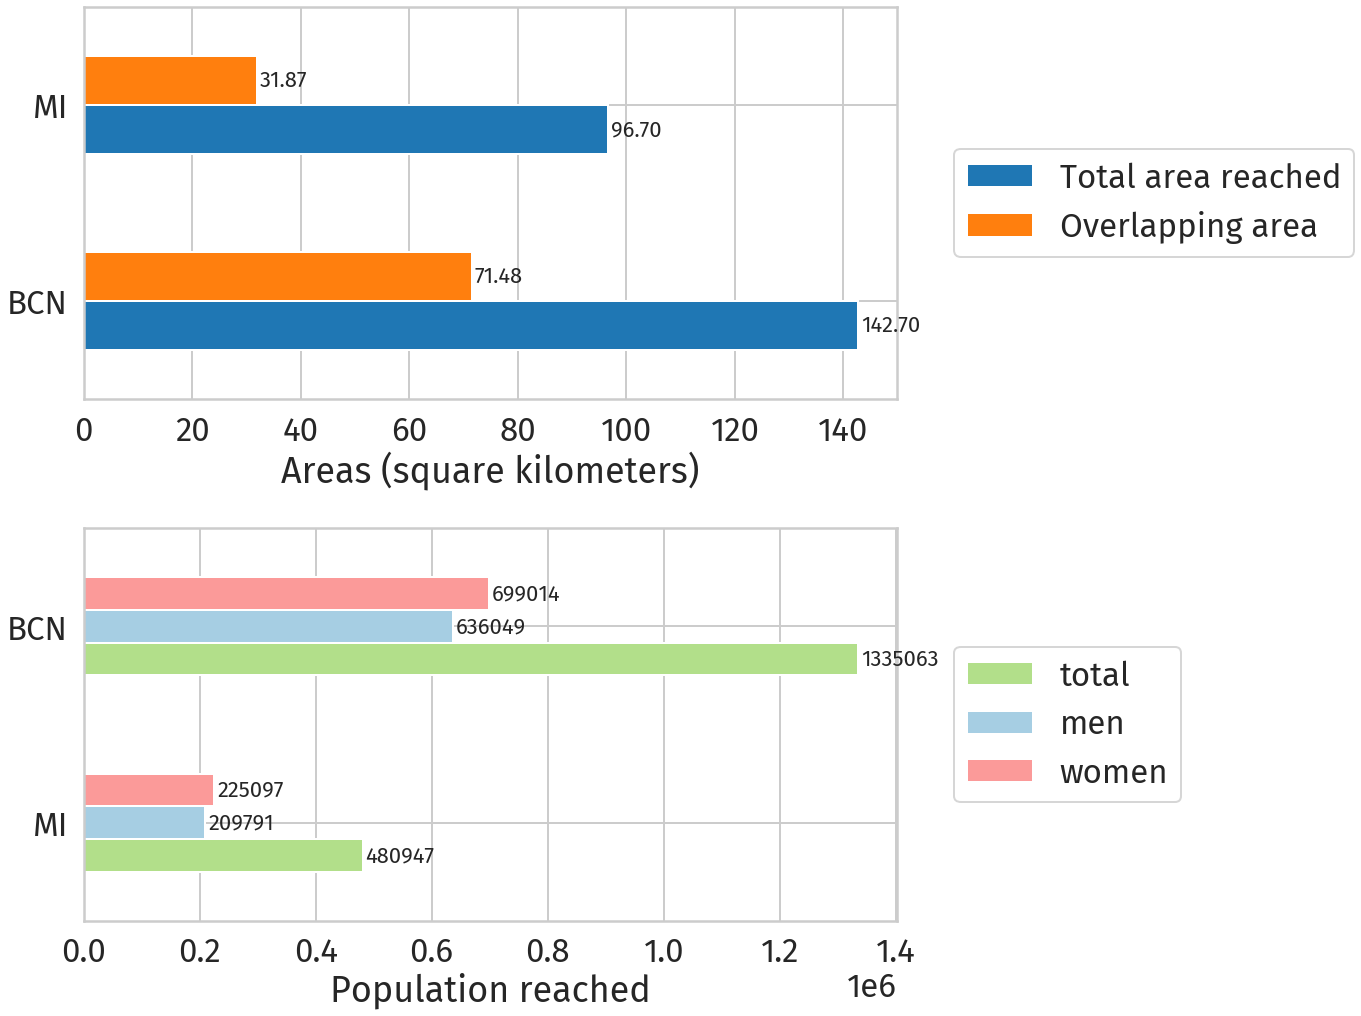

In [90]:
figure, axes = plt.subplots(2, 1, figsize=(20,15))
areas_plot.plot(ax=axes[0], kind="barh")
axes[0].bar_label(axes[0].containers[0], fmt="%.2f", size=22, padding=3)
axes[0].bar_label(axes[0].containers[1], fmt="%.2f", size=22, padding=3)
axes[0].set_xlabel('Areas (square kilometers)')
axes[0].set_ylabel('')

colors = [sns.color_palette("Paired")[2],sns.color_palette("Paired")[0],sns.color_palette("Paired")[4]]
area_total_both[["total", "men", "women"]].plot(ax=axes[1], kind="barh", color=colors)
axes[1].bar_label(axes[1].containers[0], fmt="%d", size=22, padding=3)
axes[1].bar_label(axes[1].containers[1], fmt="%d", size=22, padding=3)
axes[1].bar_label(axes[1].containers[2], fmt="%d", size=22, padding=3)
axes[1].set_xlabel('Population reached')
axes[1].set_ylabel('')

axes[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


#axes[0].title.set_text('Area')
#axes[1].title.set_text('Population')

plt.tight_layout()
plt.savefig("png" + os.sep + "labs_esp_ita_area_pop_subplot.png", dpi=300, bbox_inches='tight')
plt.savefig("svg" + os.sep + "labs_esp_ita_area_pop_subplot.svg", bbox_inches='tight')